In [1]:
from tensorflow.keras.datasets import fashion_mnist

(train_image,train_label),(test_image,test_label)=fashion_mnist.load_data()

In [2]:
print(len(train_image))
print(len(test_image))

60000
10000


In [3]:
print(len(train_label))
print(len(test_label))

60000
10000


In [4]:
test_image[0].shape

(28, 28)

In [5]:
print(train_image[0].ndim)
print(train_image[0].shape)

2
(28, 28)


In [6]:
train_label[10]

0

In [7]:
i=0
label=train_label[i]
print(f"Label {i} is:",label)

Label 0 is: 9


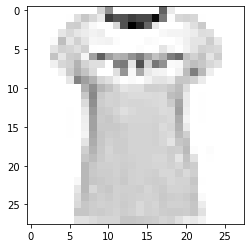

In [8]:
from matplotlib import pyplot as plt
# plt.imshow(train_image[0],cmap='binary')
plt.imshow(train_image[34],plt.cm.binary)

label: 5


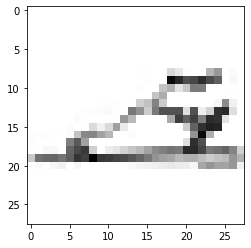

In [9]:
i=300
digit=train_image[i]
label=train_label[i]
print("label:",label)
plt.imshow(digit,cmap='binary')

label: 6


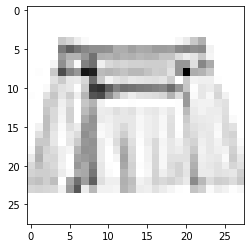

In [10]:
i=280
t_digit=train_image[i]
t_label=train_label[i]
print("label:",t_label)
plt.imshow(t_digit,plt.cm.binary)
plt.show()

In [11]:
train_image.ndim

3

In [12]:
train_image.shape

(60000, 28, 28)

In [13]:
print(test_image.shape)

(10000, 28, 28)


In [14]:
print(train_label)
print(test_label)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [15]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
print(len(train_label))
print(len)

60000
<built-in function len>


9


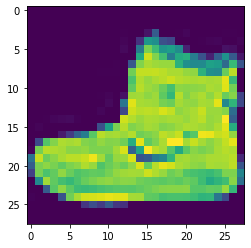

In [17]:
print(train_label[0])
plt.imshow(train_image[0])
plt.show()

# Network Archicture

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [19]:
network=Sequential()
network.add(Dense(512,activation='relu',input_shape=(28*28,))) ##relu get positive value make negative value to zero
network.add(Dense(10,activation="softmax")) ##softmax use for catagorical data or for classification problem

In [20]:
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [21]:
print(digit.shape)

(28, 28)


In [22]:
digit.reshape((28*28)).shape

(784,)

In [23]:
digit.shape

(28, 28)

# compilation Setup

In [24]:
network.compile(optimizer="rmsprop",
               loss="categorical_crossentropy",
               metrics=['accuracy'])

In [25]:
train_image=train_image.reshape((60000,28*28))
train_image=train_image.astype('float32')/255
test_image=test_image.reshape((10000,28*28))
test_image=test_image.astype('float32')/255


# preparing the labels

In [26]:
from tensorflow.keras.utils import to_categorical
train_label=to_categorical(train_label)
test_label=to_categorical(test_label)

In [27]:
test_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# train model

In [28]:
network.fit(train_image ,train_label ,epochs=5 ,batch_size=118)

Epoch 1/5
509/509 [==============================] - 11s 13ms/step - loss: 0.7238 - accuracy: 0.7514
Epoch 2/5
509/509 [==============================] - 7s 13ms/step - loss: 0.3889 - accuracy: 0.8592
Epoch 3/5
509/509 [==============================] - 7s 14ms/step - loss: 0.3364 - accuracy: 0.8774
Epoch 4/5
509/509 [==============================] - 7s 13ms/step - loss: 0.3087 - accuracy: 0.8851
Epoch 5/5
509/509 [==============================] - 7s 13ms/step - loss: 0.2871 - accuracy: 0.8942


In [29]:
loss,accuracy=network.evaluate(test_image,test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8476
